<a href="https://colab.research.google.com/github/tejpal123456789/Deep-Learning-models/blob/master/car_brand_using_transfer_learing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,Lambda,Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
# from tensorflow.appilcation.vgg16 import VGG16

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from matplotlib import pyplot as plt



In [ ]:
# re-size all the images to this
image_size=[224,224]
train_path='/content/drive/My Drive/Images_data/Datasets/Train'
test_path='/content/drive/My Drive/Images_data/Datasets/Test'


In [ ]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of resNet
# Here we will be using imagenet weights

resnet=ResNet50(input_shape=image_size+[3],weights='imagenet',include_top=False)



In [ ]:
# do not train existing weights

for layer in resnet.layers:
    layer.trainable=False
    

In [ ]:
# useful for getting number of output classes  important (/*)
folders=glob('/content/drive/My Drive/Images_data/Datasets/Train/*')
folders
print(len(folders))

3


In [ ]:
# our layers - you can add more if you want

x=Flatten()(resnet.output)
prediction= Dense(len(folders),activation='softmax')(x)

# create a model
model=Model(inputs=resnet.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# compile
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])



In [ ]:
#Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 1s 404ms/step - loss: 2.1969 - accuracy: 0.3281 - val_loss: 2.1575 - val_accuracy: 0.4483
Epoch 2/50
2/2 [==============================] - 1s 397ms/step - loss: 3.0344 - accuracy: 0.5000 - val_loss: 2.3707 - val_accuracy: 0.5862
Epoch 3/50
2/2 [==============================] - 1s 400ms/step - loss: 3.3821 - accuracy: 0.4844 - val_loss: 1.7776 - val_accuracy: 0.5690
Epoch 4/50
2/2 [==============================] - 1s 407ms/step - loss: 1.7331 - accuracy: 0.5469 - val_loss: 1.4762 - val_accuracy: 0.2931
Epoch 5/50
2/2 [==============================] - 1s 407ms/step - loss: 1.7991 - accuracy: 0.4688 - val_loss: 3.2846 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 1s 412ms/step - loss: 1.5991 - accuracy: 0.4844 - val_loss: 1.0265 - val_accuracy: 0.5517
Epoch 7/50
2/2 [==============================] - 1s 401ms/step - loss: 1.1958 - accuracy: 0.6250 - val_loss: 1.6189 - val_accuracy: 0.5862
Epoch 8/50
2/2 [====

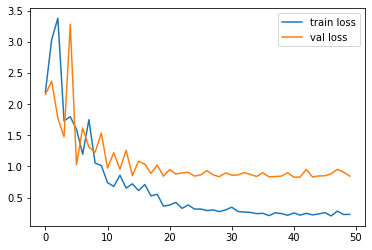

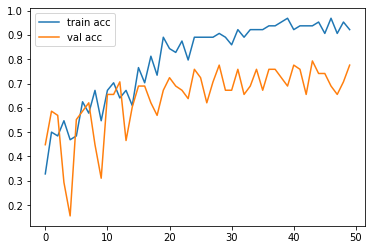

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save model it as a hs file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [ ]:
y_pred=model.predict(test_set)
y_pred

array([[2.97160894e-01, 6.11700833e-01, 9.11382809e-02],
       [2.01775759e-01, 3.29973511e-02, 7.65226841e-01],
       [5.63105196e-02, 7.26775229e-01, 2.16914266e-01],
       [2.28614523e-03, 9.91980553e-01, 5.73326088e-03],
       [8.00301731e-01, 1.97517172e-01, 2.18107062e-03],
       [5.20054288e-02, 8.91015708e-01, 5.69789037e-02],
       [9.24393833e-02, 5.72712044e-04, 9.06987906e-01],
       [3.15257639e-01, 6.65634632e-01, 1.91076975e-02],
       [9.25082266e-02, 1.51692489e-02, 8.92322540e-01],
       [4.66938823e-01, 4.15273070e-01, 1.17788188e-01],
       [4.30935211e-02, 8.65008652e-01, 9.18978676e-02],
       [2.07466092e-02, 7.68543243e-01, 2.10710198e-01],
       [1.56347051e-01, 7.37366855e-01, 1.06286138e-01],
       [1.96356356e-01, 4.05229777e-01, 3.98413837e-01],
       [7.94945508e-02, 9.12043810e-01, 8.46166629e-03],
       [4.66559567e-02, 8.48252118e-01, 1.05091952e-01],
       [2.72510909e-02, 8.88672590e-01, 8.40763450e-02],
       [1.91347420e-01, 1.84629

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1])